In [1]:
!pip install mediapipe==0.10.9
!pip install opencv-python
!pip install tensorflow
!pip install numpy
!pip install yt-dlp selenium
!pip install sklearn
!pip install cvzone
!pip install protobuf==3.20.3

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ...   error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

np.set_printoptions(precision=3, suppress=True)

In [ ]:
# Function for Frame Extraction and Augmentation
import os
import cv2
import random
import numpy as np
from PIL import Image, ImageEnhance
 
dataset_path = "CNN Dataset/Alphabet & Digits" # path to access alphabets (A-Z) & digits (1-10) videos
output_path = "CNN Dataset/images" # path to save images extracted from videos

if not os.path.exists(output_path):
    os.makedirs(output_path)

# Rotate image by a random angle
#def random_rotate(image, angle_range=(-15, 15)):
  #  angle = random.uniform(*angle_range)
  #  (h, w) = image.shape[:2]
  #  center = (w // 2, h // 2)
  #  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
 #   rotated = cv2.warpAffine(image, matrix, (w, h))
  #  return rotated

# Zoom into an image
def random_zoom(image, zoom_range=(0.9, 1.1)):
    zoom_factor = random.uniform(*zoom_range)
    h, w = image.shape[:2]
    zoomed = cv2.resize(image, (int(w * zoom_factor), int(h * zoom_factor)))
    return zoomed

# Adjust brightness randomly
def random_brightness(image, brightness_range=(0.8, 1.2)):
    enhancer = ImageEnhance.Brightness(Image.fromarray(image))
    factor = random.uniform(*brightness_range)
    brightened_image = np.array(enhancer.enhance(factor))
    return brightened_image

# Process videos and save augmented frames
def process_videos(video_path, output_path, frame_interval=10):
    cap = cv2.VideoCapture(video_path)
    frame_num = 0
    successful_frames = 0

    video_name = os.path.basename(video_path).split('.')[0]
    
    if not cap.isOpened():
        print(f"Error opening video: {video_path}")
        return

    aug_counter = 1
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_num % frame_interval == 0:
            #rotated_frame = random_rotate(frame)
            zoomed_frame = random_zoom(frame)
            brightened_frame = random_brightness(frame)

            frame_variants = [frame, zoomed_frame, brightened_frame]
            for variant in frame_variants:
                output_filename = f"{video_name}({aug_counter}).jpg"
                output_filepath = os.path.join(output_path, output_filename)
                cv2.imwrite(output_filepath, variant)
                aug_counter += 1

        frame_num += 1

    cap.release()
    print(f"Processed {frame_num} frames and saved {aug_counter} augmented images for {video_name}")

for video_file in os.listdir(dataset_path):
    video_path = os.path.join(dataset_path, video_file)
    if video_file.endswith(('.mp4','.mkv')):
        print(f"Processing video: {video_file}")
        process_videos(video_path, output_path)

print("All videos processed successfully!")

Processing video: T.mp4
Processed 107 frames and saved 34 augmented images for T
Processing video: Z.mp4
Processed 113 frames and saved 37 augmented images for Z
Processing video: M.mp4
Processed 118 frames and saved 37 augmented images for M
Processing video: R.mp4
Processed 103 frames and saved 34 augmented images for R
Processing video: 10.mkv
Processed 114 frames and saved 37 augmented images for 10
Processing video: 6.mkv
Processed 116 frames and saved 37 augmented images for 6
Processing video: O.mp4
Processed 119 frames and saved 37 augmented images for O
Processing video: B.mp4
Processed 129 frames and saved 40 augmented images for B
Processing video: 4.mkv
Processed 109 frames and saved 34 augmented images for 4
Processing video: F.mp4
Processed 114 frames and saved 37 augmented images for F
Processing video: A.mp4
Processed 137 frames and saved 43 augmented images for A
Processing video: C.mp4
Processed 116 frames and saved 37 augmented images for C
Processing video: 8.mkv
Pr

In [ ]:
import os
import shutil
import random

# Split the Dataset
image_dir = "CNN Dataset/images/"
output_dir = "CNN Dataset/split_dataset/" # path to save split dataset

train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'validation')
test_dir = os.path.join(output_dir, 'test')

for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

all_images = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

random.shuffle(all_images)

total_images = len(all_images)
train_size = int(total_images * train_ratio)
val_size = int(total_images * val_ratio)

train_images = all_images[:train_size]
val_images = all_images[train_size:train_size + val_size]
test_images = all_images[train_size + val_size:]

def copy_images(image_list, destination):
    for img in image_list:
        src_path = os.path.join(image_dir, img)
        dst_path = os.path.join(destination, img)
        shutil.copy(src_path, dst_path)

copy_images(train_images, train_dir)
copy_images(val_images, val_dir)
copy_images(test_images, test_dir)

print(f"Total images: {total_images}")
print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Testing set: {len(test_images)} images")

Total images: 1287
Training set: 900 images
Validation set: 193 images
Testing set: 194 images


In [ ]:
import os
import shutil

image_base_dir = 'CNN Dataset/split_dataset/train/' # path to access train dataset
target_base_dir = 'CNN Dataset/split_dataset/train/'

if not os.path.exists(target_base_dir):
    os.makedirs(target_base_dir)

def normalize_filename(filename):
    return filename.split('(')[0]

for image_filename in os.listdir(image_base_dir):
    if image_filename.endswith('.jpg'):
        class_label = normalize_filename(image_filename)
        class_folder = os.path.join(target_base_dir, class_label)

        if not os.path.exists(class_folder):
            os.makedirs(class_folder)

        source_image_path = os.path.join(image_base_dir, image_filename)
        target_image_path = os.path.join(class_folder, image_filename)
        
        # Move the image to the target class folder
        shutil.move(source_image_path, target_image_path)

        print(f'Moved {image_filename} to {class_folder}')

print("All images have been grouped into class-based folders.")

Moved S(13).jpg to /kaggle/working/split_dataset/train/S
Moved H(6).jpg to /kaggle/working/split_dataset/train/H
Moved F(2).jpg to /kaggle/working/split_dataset/train/F
Moved 10(27).jpg to /kaggle/working/split_dataset/train/10
Moved X(25).jpg to /kaggle/working/split_dataset/train/X
Moved V(8).jpg to /kaggle/working/split_dataset/train/V
Moved Z(24).jpg to /kaggle/working/split_dataset/train/Z
Moved C(1).jpg to /kaggle/working/split_dataset/train/C
Moved H(11).jpg to /kaggle/working/split_dataset/train/H
Moved Q(28).jpg to /kaggle/working/split_dataset/train/Q
Moved U(34).jpg to /kaggle/working/split_dataset/train/U
Moved L(26).jpg to /kaggle/working/split_dataset/train/L
Moved J(34).jpg to /kaggle/working/split_dataset/train/J
Moved 2(34).jpg to /kaggle/working/split_dataset/train/2
Moved R(5).jpg to /kaggle/working/split_dataset/train/R
Moved E(5).jpg to /kaggle/working/split_dataset/train/E
Moved 8(31).jpg to /kaggle/working/split_dataset/train/8
Moved V(3).jpg to /kaggle/working/s

In [ ]:
import os
import shutil

image_base_dir = 'CNN Dataset/split_dataset/validation/' # path to access validation dataset
target_base_dir = 'CNN Dataset/split_dataset/validation/'

if not os.path.exists(target_base_dir):
    os.makedirs(target_base_dir)

def normalize_filename(filename):
    return filename.split('(')[0]

for image_filename in os.listdir(image_base_dir):
    if image_filename.endswith('.jpg'):
        class_label = normalize_filename(image_filename)
        class_folder = os.path.join(target_base_dir, class_label)

        if not os.path.exists(class_folder):
            os.makedirs(class_folder)

        source_image_path = os.path.join(image_base_dir, image_filename)
        target_image_path = os.path.join(class_folder, image_filename)
        
        # Move the image to the target class folder
        shutil.move(source_image_path, target_image_path)

print("All images have been grouped into class-based folders.")

All images have been grouped into class-based folders.


In [7]:
def resize_image(image, target_size):
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [53]:
def extract_feature(input_image):
    TARGET_IMAGE_SIZE = (128, 128)
    image = cv2.imread(input_image)
    resized_image = resize_image(image, TARGET_IMAGE_SIZE)

    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils

    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7) as hands:
        results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
        image_height, image_width, _ = image.shape

        if not results.multi_hand_landmarks:
            return [0.0] * 63  # Return all zeros

        hand_landmarks = results.multi_hand_landmarks[0]
        landmarks = extract_landmarks(hand_landmarks, image_width, image_height)

        if len(landmarks) != 63:
            print(f"Warning: Extracted {len(landmarks)} landmarks instead of 63.")
            return [0.0] * 63
            
        # Draw landmarks for visualization
        annotated_image = cv2.flip(image.copy(), 1)
        mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    return landmarks, annotated_image

def extract_landmarks(landmarks, image_width, image_height):
    result = []
    for lm in landmarks.landmark:
        x = lm.x * image_width
        y = lm.y * image_height
        z = lm.z  # keep as-is, not scaled
        result.extend([x, y, z])
    return result

In [41]:
import csv
import os

def toCSV(filecsv, class_type, *landmark_list):
    if len(landmark_list) != 63:
        raise ValueError("Expected 63 landmark values (21 points x 3). Got: {}".format(len(landmark_list)))

    headers = ["class_type"]
    joint_names = [
        "wrist",
        "thumb_Cmc", "thumb_Mcp", "thumb_Ip", "thumb_Tip",
        "index_Mcp", "index_Pip", "index_Dip", "index_Tip",
        "middle_Mcp", "middle_Pip", "middle_Dip", "middle_Tip",
        "ring_Mcp", "ring_Pip", "ring_Dip", "ring_Tip",
        "pinky_Mcp", "pinky_Pip", "pinky_Dip", "pinky_Tip"
    ]
    coords = ["X", "Y", "Z"]
    for joint in joint_names:
        for coord in coords:
            headers.append(f"{joint}{coord}")

    file_exists = os.path.isfile(filecsv)

    with open(filecsv, 'a+', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(headers)
        writer.writerow([class_type] + list(landmark_list))

In [ ]:
import os

image_paths = "CNN Dataset/split_dataset/train/" # path to access train dataset
csv_path = "CNN Dataset/training_landmarks.csv" # path to save training landmarks in csv

# Check and reset CSV file
if os.path.exists(csv_path):
    print("CSV file exists. Deleting and replacing with new.")
    os.remove(csv_path)
else:
    print("CSV file does not exist. Will create after extraction.")

# Traverse each class folder
for class_name in os.listdir(image_paths):
    class_path = os.path.join(image_paths, class_name)
    if not os.path.isdir(class_path):
        continue

    for root, _, filenames in os.walk(class_path):
        valid_files = [f for f in filenames if f.lower().endswith((".jpg", ".png"))]
        print(f"Inside Folder '{class_name}' - Contains: {len(valid_files)} image(s)")

        for filename in valid_files:
            image_path = os.path.join(root, filename)

            try:
                result = extract_feature(image_path)

                # Split landmarks and annotated image
                landmark_list = result

                # Optional: Check wrist (landmark 0) is not at origin
                wrist_x, wrist_y = landmark_list[0], landmark_list[1]
                if wrist_x == 0 and wrist_y == 0:
                    print(f"{image_path} - No valid hand landmarks (wrist at origin)")
                    continue

                # Save landmarks to CSV
                toCSV(csv_path, class_name, *landmark_list)

            except Exception as e:
                print(f"Error processing '{image_path}': {e}")

print("=================== Feature Extraction for TRAINING is Completed ===================")

CSV file does not exist. Will create after extraction.
Inside Folder '9' - Contains: 29 image(s)
Inside Folder 'P' - Contains: 21 image(s)
Inside Folder '8' - Contains: 23 image(s)
Inside Folder 'R' - Contains: 19 image(s)
Inside Folder 'L' - Contains: 23 image(s)
Inside Folder 'G' - Contains: 27 image(s)
Inside Folder 'O' - Contains: 20 image(s)
Inside Folder 'T' - Contains: 26 image(s)
Inside Folder 'F' - Contains: 27 image(s)
Inside Folder 'N' - Contains: 25 image(s)
Inside Folder 'W' - Contains: 27 image(s)
Inside Folder 'Q' - Contains: 33 image(s)
Inside Folder 'Z' - Contains: 21 image(s)
/kaggle/working/split_dataset/train/Z/Z(31).jpg - No valid hand landmarks (wrist at origin)
/kaggle/working/split_dataset/train/Z/Z(32).jpg - No valid hand landmarks (wrist at origin)
/kaggle/working/split_dataset/train/Z/Z(35).jpg - No valid hand landmarks (wrist at origin)
/kaggle/working/split_dataset/train/Z/Z(29).jpg - No valid hand landmarks (wrist at origin)
/kaggle/working/split_dataset/t

In [ ]:
import os

image_paths = "CNN Dataset/split_dataset/validation/" # path to access validation data
csv_path = "CNN Dataset/validation_landmarks.csv" # path to save validation landmarks in csv

# Check and reset CSV file
if os.path.exists(csv_path):
    print("CSV file exists. Deleting and replacing with new.")
    os.remove(csv_path)
else:
    print("CSV file does not exist. Will create after extraction.")

# Traverse each class folder
for class_name in os.listdir(image_paths):
    class_path = os.path.join(image_paths, class_name)
    if not os.path.isdir(class_path):
        continue

    for root, _, filenames in os.walk(class_path):
        valid_files = [f for f in filenames if f.lower().endswith((".jpg", ".png"))]
        print(f"Inside Folder '{class_name}' - Contains: {len(valid_files)} image(s)")

        for filename in valid_files:
            image_path = os.path.join(root, filename)

            try:
                result = extract_feature(image_path)

                # Split landmarks and annotated image
                landmark_list = result

                # Optional: Check wrist (landmark 0) is not at origin
                wrist_x, wrist_y = landmark_list[0], landmark_list[1]
                if wrist_x == 0 and wrist_y == 0:
                    print(f"{image_path} - No valid hand landmarks (wrist at origin)")
                    continue

                # Save landmarks to CSV
                toCSV(csv_path, class_name, *landmark_list)

            except Exception as e:
                print(f"Error processing '{image_path}': {e}")

print("=================== Feature Extraction for VALIDATION is Completed ===================")

CSV file does not exist. Will create after extraction.
Inside Folder '9' - Contains: 3 image(s)
Inside Folder 'P' - Contains: 9 image(s)
Inside Folder '8' - Contains: 7 image(s)
Inside Folder 'R' - Contains: 5 image(s)
Inside Folder 'L' - Contains: 7 image(s)
Inside Folder 'G' - Contains: 5 image(s)
Inside Folder 'O' - Contains: 7 image(s)
Inside Folder 'T' - Contains: 4 image(s)
Inside Folder 'F' - Contains: 6 image(s)
Inside Folder 'N' - Contains: 5 image(s)
Inside Folder 'Q' - Contains: 3 image(s)
Inside Folder 'Z' - Contains: 9 image(s)
/kaggle/working/split_dataset/validation/Z/Z(28).jpg - No valid hand landmarks (wrist at origin)
/kaggle/working/split_dataset/validation/Z/Z(36).jpg - No valid hand landmarks (wrist at origin)
/kaggle/working/split_dataset/validation/Z/Z(34).jpg - No valid hand landmarks (wrist at origin)
Inside Folder '10' - Contains: 2 image(s)
Inside Folder 'U' - Contains: 5 image(s)
Inside Folder 'C' - Contains: 3 image(s)
Inside Folder '1' - Contains: 5 image(

In [ ]:
df_train = pd.read_csv("CNN Dataset/training_landmarks.csv", header=0)

df_train = df_train.sort_values(by=["class_type"])
df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
424,1,703.323746,600.520248,-2.671518e-07,641.337051,563.554902,-0.027096,592.142944,477.370291,-0.052345,...,-0.074811,775.766144,380.342002,-0.104871,755.659256,442.268672,-0.081567,772.982635,454.772401,-0.056202
421,1,703.293533,600.666590,-2.702772e-07,641.102829,562.663379,-0.027721,590.774002,476.411133,-0.053593,...,-0.075189,775.060577,378.870735,-0.105097,754.735107,440.630207,-0.081861,772.339554,453.512192,-0.056682
420,1,702.923813,600.758471,-2.878400e-07,641.190948,564.412050,-0.026480,590.330048,476.085963,-0.050532,...,-0.071607,778.488617,378.631482,-0.101319,757.029114,441.700172,-0.077610,772.599411,455.150743,-0.052259
419,1,705.850372,600.432658,-2.575655e-07,644.140625,567.038469,-0.027243,592.915039,478.906960,-0.051126,...,-0.073627,779.078903,385.005269,-0.104028,760.255508,446.874089,-0.080890,776.295853,455.908456,-0.055502
418,1,701.327438,602.258406,-3.019900e-07,641.212311,565.238428,-0.026726,590.967636,476.961050,-0.050659,...,-0.071921,778.171844,379.399924,-0.101501,757.220078,441.429591,-0.078800,772.623215,454.926939,-0.054265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Z,382.696238,455.259845,-2.753646e-07,427.736602,372.352525,-0.029525,426.854542,282.125563,-0.038515,...,-0.010034,213.693707,273.142992,-0.043265,251.215399,315.783247,-0.033275,271.983255,338.896355,-0.016488
301,Z,639.816818,516.805029,-4.673317e-08,710.395203,441.479974,-0.023133,742.458725,344.470310,-0.031934,...,-0.018129,522.093086,287.934837,-0.045742,557.011604,328.276012,-0.037401,576.384811,356.472294,-0.023592
300,Z,705.281219,696.546636,-9.036081e-08,769.436493,658.661184,-0.010743,824.528046,615.614648,-0.023274,...,-0.063089,682.334518,712.194042,-0.082544,704.821396,739.246330,-0.077242,710.848846,747.844505,-0.071034
308,Z,508.861084,602.385478,-2.170307e-07,562.063751,519.106364,-0.033363,568.721199,419.095330,-0.042081,...,-0.008104,327.389259,398.301387,-0.040112,368.944054,445.722585,-0.029383,390.298729,473.381224,-0.012106


In [ ]:
# Read CSV file for Validation or Testing the Model using Pandas
df_validation = pd.read_csv("CNN Dataset/validation_landmarks.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_validation = df_validation.sort_values(by=["class_type"])
df_validation

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
77,1,703.153534,601.678920,-2.901411e-07,642.942505,566.544514,-0.027443,592.962189,478.549819,-0.050981,...,-0.071030,783.027496,380.461092,-0.100157,760.510635,442.416945,-0.077681,774.190140,455.888243,-0.053476
78,1,695.248795,599.029713,-3.041047e-07,637.188416,561.990252,-0.026085,587.224846,472.012739,-0.048462,...,-0.073821,774.804077,374.292269,-0.103027,751.738739,436.070366,-0.080128,765.378571,450.811443,-0.055276
79,1,707.828709,608.925953,-3.099935e-07,647.703025,570.207543,-0.026028,596.209978,481.309244,-0.049696,...,-0.072251,784.683931,384.367249,-0.101371,763.086587,446.650867,-0.078923,779.243215,459.743330,-0.054857
80,1,704.821701,603.653412,-2.772986e-07,643.902969,568.285933,-0.026787,594.335709,480.551348,-0.050409,...,-0.072411,785.266266,381.629291,-0.101469,763.080597,443.770409,-0.078004,776.215134,457.200294,-0.052907
81,1,738.008234,631.041064,-2.867715e-07,674.700922,594.710011,-0.026908,622.194688,502.795060,-0.050202,...,-0.070455,819.688745,400.997341,-0.099651,796.996471,465.199628,-0.077185,811.831994,477.925599,-0.052828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Z,690.770713,554.827102,-3.819378e-08,766.658904,477.709082,-0.023398,802.249119,373.588244,-0.033148,...,-0.019583,565.435695,311.402142,-0.046549,601.833261,357.446030,-0.036411,620.744019,385.109633,-0.021265
63,Z,716.298904,623.595572,-7.274457e-08,792.940521,572.328215,-0.033504,842.742920,485.502577,-0.047400,...,-0.027536,583.993301,381.822281,-0.063419,614.153824,432.282314,-0.057546,634.981956,473.598204,-0.043044
61,Z,704.651212,614.653629,-7.542947e-08,780.515353,564.097767,-0.033227,829.861481,478.227296,-0.047351,...,-0.028183,575.027011,376.262009,-0.064015,603.534324,425.416329,-0.057844,623.379730,466.160167,-0.042996
62,Z,659.298244,683.501660,-2.378540e-07,714.280455,648.442881,-0.023272,757.783326,587.398055,-0.041588,...,-0.043959,541.053833,562.835596,-0.067229,569.588480,601.286175,-0.058399,583.888671,609.053379,-0.048571


In [46]:
# Convert class_type to categorical and then encode as numerical codes
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_validation["class_type"] = pd.Categorical(df_validation["class_type"])
df_validation["class_type"] = df_validation.class_type.cat.codes

In [47]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_validation = df_validation.pop("class_type")
x_validation = df_validation.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_validation = np.array(x_validation)

In [48]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_validation.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_validation = np.reshape(x_validation, (x_validation.shape[0], x_validation.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_validation.shape)

(895, 63)
(190, 63)
(895, 63, 1)
(190, 63, 1)


In [49]:
# Number of classes according MSL alphabets and digits (1-10)
num_classes = 36

# Using Keras.Utils to put the label categorically
y_train = to_categorical(y_train, num_classes)
y_validation = to_categorical(y_validation, num_classes)

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                          padding="causal", activation="relu",
                          input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                          padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1,
                           padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 63, 32)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 63, 32)              │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 31, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 31, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 31, 64)              │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 15, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 15, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 7, 256)              │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 7, 256)              │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │          18,468 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,063,556 (4.06 MB)

 Trainable params: 1,063,556 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_validation, y_validation))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0265 - loss: 4.2032 - val_accuracy: 0.0316 - val_loss: 3.5019
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1328 - loss: 3.2112 - val_accuracy: 0.2947 - val_loss: 2.5252
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3191 - loss: 2.0465 - val_accuracy: 0.2842 - val_loss: 2.5573
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5190 - loss: 1.3296 - val_accuracy: 0.7263 - val_loss: 2.1566
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8170 - loss: 0.5567 - val_accuracy: 0.7947 - val_loss: 2.1895
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8555 - loss: 0.4380 - val_accuracy: 0.8579 - val_loss: 2.6453
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9142 - loss: 0.2348 - val_accuracy: 0.8579 - val_loss: 2.6558
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9069 - loss: 0.2619 - val_accuracy: 0.

In [ ]:
save_model = "model_CNN.h5"
model.save(save_model)
print("Model Saved into", save_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_tflite = converter.convert()

with open("CNNModel.tflite", "wb") as f:
    f.write(model_tflite)
print("Model converted to TensorFlow Lite and saved as CNNModel.tflite")

In [ ]:
import os
def generate_labels_txt(dataset_dir, output_file="labels.txt"):
    labels = sorted(os.listdir(dataset_dir))

    with open(output_file, "w") as f:
        for label in labels:
            f.write(f"{label}\n")

    return labels
    
dataset_dir = "CNN Dataset/split_dataset/train" # path to access train folder
labels = generate_labels_txt(dataset_dir)

Wrist coordinates: 679.0830993652344 573.2201671600342 -8.81319351719867e-07


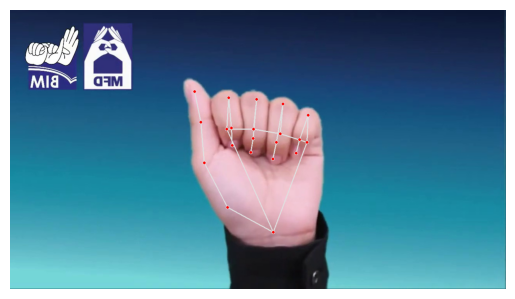

In [ ]:
path_to_image = "CNN Dataset/split_dataset/test/A(10).jpg" # path to a testing image

landmark_list, output_IMG = extract_feature(path_to_image)

# Optional: print wrist coordinates
print("Wrist coordinates:", landmark_list[0], landmark_list[1], landmark_list[2])

# Display image with landmarks
plt.axis("off")
plt.imshow(cv2.cvtColor(output_IMG, cv2.COLOR_BGR2RGB))
plt.show()

In [59]:
input_IMG = np.array(landmark_list).reshape(1, 63, 1)  # assuming 21 keypoints × 3 coordinates

In [60]:
reverse_classes = {i: label for i, label in enumerate(labels)}
predictions = model.predict(input_IMG)
predicted_classes = np.argmax(predictions, axis=1)
predicted_label = reverse_classes[predicted_classes[0]]

print(predictions)
print(predicted_classes)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[10]
Predicted Label: A


In [56]:
labels = generate_labels_txt(dataset_dir)
reverse_classes = {i: label for i, label in enumerate(labels)}
class_to_index = {label: i for i, label in enumerate(labels)}

In [ ]:
from sklearn.metrics import classification_report
import os
import numpy as np

test_dir = "CNN Dataset/split_dataset/test"
true_labels = []
pred_labels = []

for img_name in os.listdir(test_dir):
    if not img_name.endswith(".jpg"):
        continue
    
    # Get image path
    img_path = os.path.join(test_dir, img_name)
    
    # Extract true label from filename (first character or use another method as needed)
    true_label = img_name[0]  # Modify this if your label logic is different
    true_labels.append(true_label)
    
    # Extract features
    result = extract_feature(img_path)
    features = result[:-1]  # all 63 features
    # output_IMG = result[-1]  # optional if you want the image

    input_IMG = np.array([features]).reshape(1, -1, 1)  # shape (1, 63, 1)

    # Predict
    prediction = model.predict(input_IMG)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = reverse_classes[predicted_class]
    pred_labels.append(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [58]:
print(classification_report(true_labels, pred_labels, labels=labels, target_names=labels))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         9
          10       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         4
           A       1.00      1.00      1.00         9
           B       1.00      1.00      1.00         8
           C       1.00      1.00      1.00         5
           D       1.00      1.00      1.00         7
           E       0.83      1.00      0.91         5
           F       1.00      1.00      1.00         3
           G       1.00      1.00      1.00         4
           H       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
